In [9]:
%%capture
%matplotlib inline

import numpy as np
from keras import backend as K
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from keras.preprocessing import image
from matplotlib import pyplot as plt

import sys
sys.path.append("../")
import rise

K.set_learning_phase(0)

model = MobileNetV2()
input_size = (224, 224)

In [10]:
def load_img(path):
    img = image.load_img(path, target_size=input_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x


def class_name(idx):
    return decode_predictions(np.eye(1, 1000, idx))[0][0][1]

In [25]:
explainer = rise.RiseImageExplainer()
explainer.fit(model.predict,
            input_size,
            number_of_masks=500,
            mask_granularity=10,
            mask_density=0.5,
            channels_last=True)

img, x = load_img('bullcar.jpg')
sal = explainer.explain(x)

Calculating saliency maps: 100%|██████████| 25/25 [00:09<00:00,  2.59it/s]


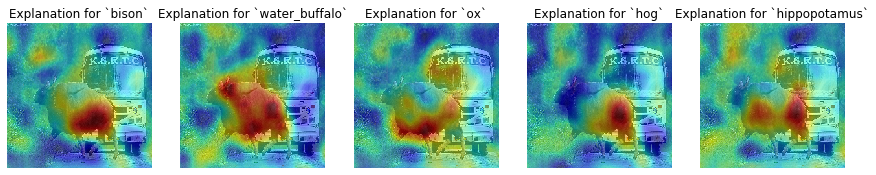

In [26]:
class_idxs = model.predict(x).argsort()[0][::-1]
fig, axes = plt.subplots(1, 5)
fig.set_size_inches(15, 6)
for i in range(5):
    class_idx = class_idxs[i]
    axes[i].set_title('Explanation for `{}`'.format(class_name(class_idx)))
    axes[i].axis('off')
    axes[i].imshow(img)
    axes[i].imshow(sal[class_idx], cmap='jet', alpha=0.5)

plt.show()